# Trajectory Metrics — Single-Run Analysis

## Purpose
Load one trajectory metrics CSV, derive basic statistics, flag scattering, and plot key time series.

In [69]:
# %% Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

specify_mpl_style = True
if specify_mpl_style:
    plt.style.use("/Users/samuel/Desktop/postdoc_PhLAM/codes/mystyle.mplstyle")

import matplotlib.style as mplstyle
mplstyle.use('fast') #The fast style set simplification and chunking parameters to reasonable settings to speed up plotting large amounts of data


Bad key legend.ncol in file /Users/samuel/Desktop/postdoc_PhLAM/codes/mystyle.mplstyle, line 37 ('legend.ncol: 1')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [70]:

# %% Paramètres
csv_path = "results/Normal_100K_15eV_results/nve_2_metrics.csv"   # change si besoin
#csv_path = "Normal_300K_01eV_results/vasprun-1_full_metrics.csv"   # change si besoin
SCATTER_Z = 8.0   # Å  seuil COM_z-ztop pour considérer "scattered"
ROLL = 25         # fenêtre de lissage (points)

# %% Lecture
df = pd.read_csv(csv_path)
df.columns

Index(['state', 't_idx', 'd_NO(Å)', 'COM_z-ztop(Å)', 'NO_theta(°)',
       'NO_phi(°)', 'Vcm_x(Å/fs)', 'Vcm_y(Å/fs)', 'Vcm_z(Å/fs)',
       'Vcm_theta(°)', 'Vcm_phi(°)', 'Ecm(eV)', 'E_pot(eV)', 'Evib_cin(eV)',
       'Evib_tot(eV)', 'Erot(eV)', 'j_rot', 'output'],
      dtype='object')

In [71]:
# %% Nettoyage minimal + alias colonnes utiles (adapté à tes en-têtes)
t = df["t_idx"].to_numpy()                        # index/temps (fs ou pas, selon ta définition)
z = df["COM_z-ztop(Å)"].to_numpy()
dNO = df["d_NO(Å)"].to_numpy()
Ecm = df["Ecm(eV)"].to_numpy()
Epot = df["E_pot(eV)"].to_numpy()
Evib_tot = df["Evib_tot(eV)"].to_numpy()
Evib_cin = df["Evib_cin(eV)"].to_numpy()
Erot = df["Erot(eV)"].to_numpy()
jrot = df["j_rot"].to_numpy()
Vcm = df[["Vcm_x(Å/fs)","Vcm_y(Å/fs)","Vcm_z(Å/fs)"]].to_numpy()

# Flags évènements
scattered = (z >= SCATTER_Z)
impact = np.argmax(np.abs(Vcm[:,2]) == np.max(np.abs(Vcm[:,2])))  # heuristique simple

In [72]:
# %% Statistiques de base
def _stats(x):
    return dict(n=len(x), mean=float(np.nanmean(x)), std=float(np.nanstd(x)),
                min=float(np.nanmin(x)), max=float(np.nanmax(x)))
summary = {
    "d_NO(Å)": _stats(dNO),
    "COM_z-ztop(Å)": _stats(z),
    "Ecm(eV)": _stats(Ecm),
    "E_pot(eV)": _stats(Epot),
    "Evib_tot(eV)": _stats(Evib_tot),
    "Erot(eV)": _stats(Erot),
}
summary

{'d_NO(Å)': {'n': 801,
  'mean': 1.175071036204744,
  'std': 0.03487413552175094,
  'min': 1.121,
  'max': 1.2232},
 'COM_z-ztop(Å)': {'n': 801,
  'mean': 5.605147315855181,
  'std': 2.262902669174751,
  'min': 1.882,
  'max': 9.858},
 'Ecm(eV)': {'n': 801,
  'mean': 0.5815141073657928,
  'std': 0.46850709342814956,
  'min': 0.0139,
  'max': 1.6363},
 'E_pot(eV)': {'n': 801,
  'mean': 0.060866042446941326,
  'std': 0.042868043272648496,
  'min': 0.0,
  'max': 0.1386},
 'Evib_tot(eV)': {'n': 801,
  'mean': 0.11837028714107366,
  'std': 0.0034514960540587276,
  'min': 0.1097,
  'max': 0.1387},
 'Erot(eV)': {'n': 801,
  'mean': 0.02487503121098627,
  'std': 0.013517805367471216,
  'min': 0.0,
  'max': 0.0485}}

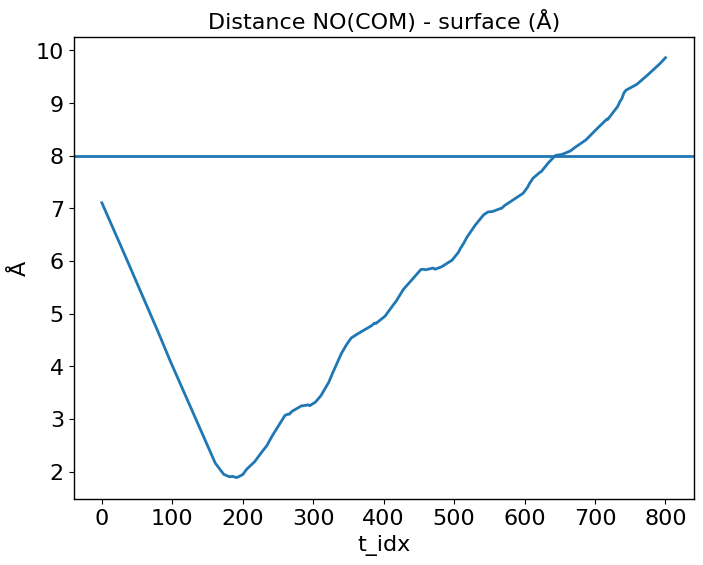

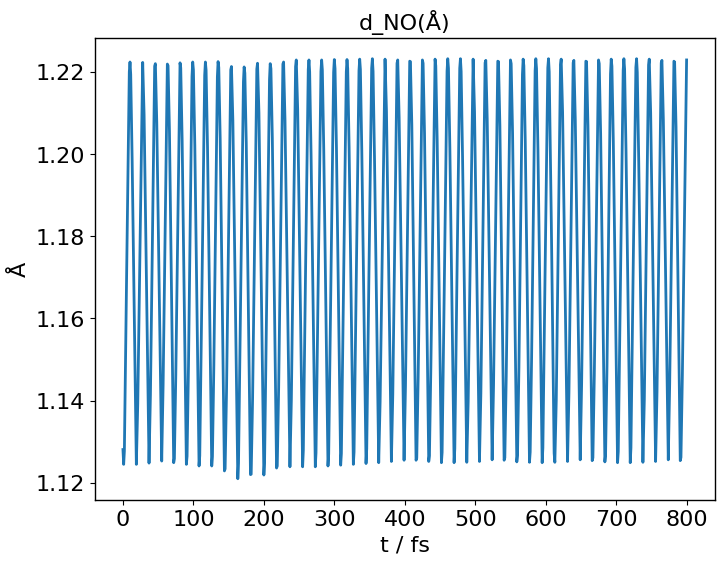

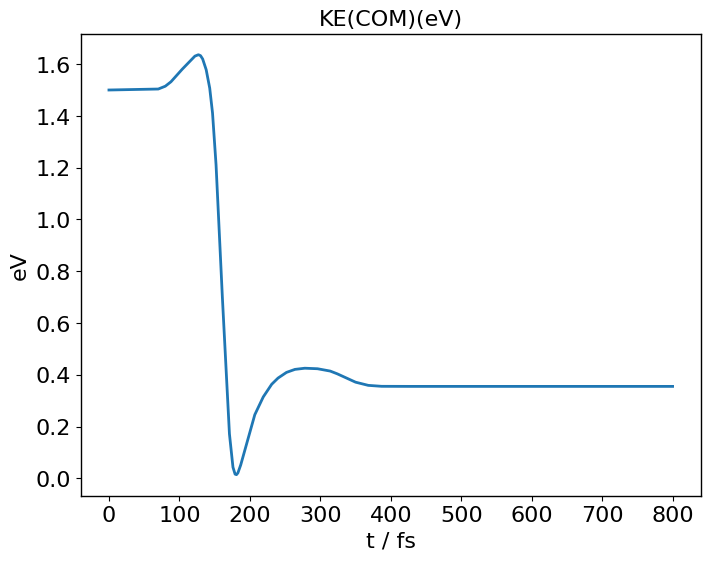

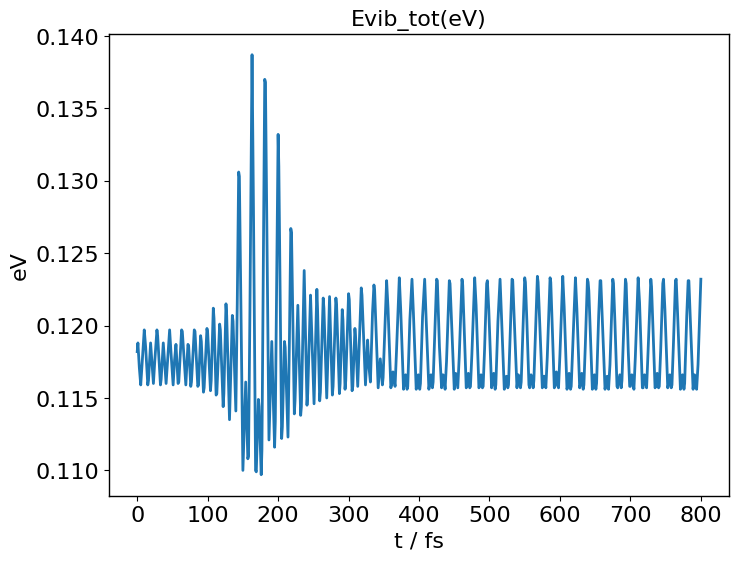

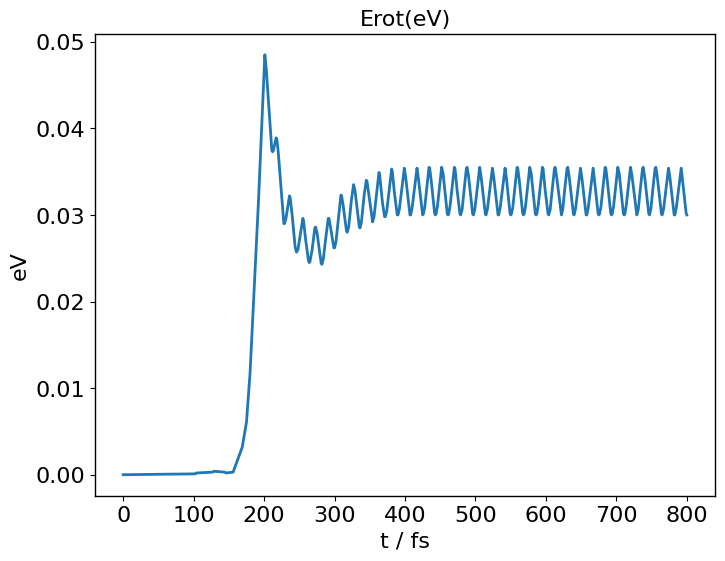

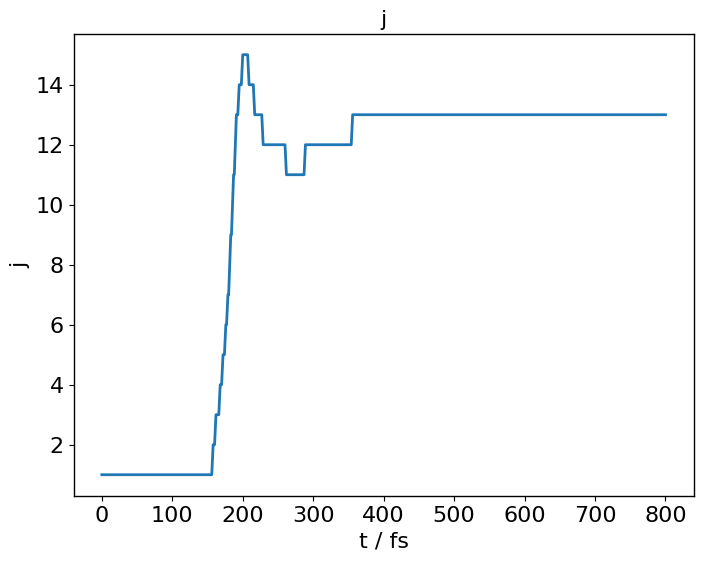

In [73]:
# %% Séries temporelles principales (1 figure par variable)
plt.figure(); plt.plot(t, z); plt.axhline(SCATTER_Z); plt.title("Distance NO(COM) - surface (Å)"); plt.xlabel("t_idx"); plt.ylabel("Å"); plt.show()
plt.figure(); plt.plot(t, dNO); plt.title("d_NO(Å)"); plt.xlabel("t / fs"); plt.ylabel("Å"); plt.show()

plt.figure(); plt.plot(t, Ecm); plt.title("KE(COM)(eV)"); plt.xlabel("t / fs"); plt.ylabel("eV"); plt.show()
plt.figure(); plt.plot(t, Evib_tot); plt.title("Evib_tot(eV)"); plt.xlabel("t / fs"); plt.ylabel("eV"); plt.show()
plt.figure(); plt.plot(t, Erot); plt.title("Erot(eV)"); plt.xlabel("t / fs"); plt.ylabel("eV"); plt.show()
plt.figure(); plt.plot(t, jrot); plt.title("j"); plt.xlabel("t / fs"); plt.ylabel("j"); plt.show()